<a href="https://colab.research.google.com/github/ankur2392roy/Online-fraud/blob/main/Online_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns


In [17]:
df=pd.read_csv('onlinefraud.csv',index_col=False)
df.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [48]:
#Filter out transaction types by fraud or not fraud
df_fraud=df[df['isFraud']==1.0]
df_notfraud=df[df['isFraud']==0.0]
print(df[df['isFraud']==1.0].shape[0])


8213


In [73]:
payment_type=df['type'].unique()
print(payment_type)
df.loc[(df['type']=='TRANSFER') & (df['isFraud']==1.0), 'Fraud']=1.0
df.loc[(df['type']=='TRANSFER' )& (df['isFraud']==0.0), 'Fraud']=0.0
df.groupby('Fraud').count()

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Fraud,,,,,,,,,,,
0.0,528812,528812,528812,528812,528812,528812,528812,528812,528812,528812,528812
1.0,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097,4097


[         step     type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1  PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1           1  PAYMENT   1864.28  C1666544295        21249.0        19384.72   
4           1  PAYMENT  11668.14  C2048537720        41554.0        29885.86   
5           1  PAYMENT   7817.71    C90045638        53860.0        46042.29   
6           1  PAYMENT   7107.77   C154988899       183195.0       176087.23   
...       ...      ...       ...          ...            ...             ...   
6362312   718  PAYMENT   8178.01  C1213413071        11742.0         3563.99   
6362314   718  PAYMENT  17841.23  C1045048098        10182.0            0.00   
6362316   718  PAYMENT   1022.91  C1203084509           12.0            0.00   
6362318   718  PAYMENT   4109.57   C673558958         5521.0         1411.43   
6362319   718  PAYMENT   8634.29   C642813806       518802.0       510167.71   

            nameDest  oldbalanceDest  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9792e52dd0>],
      dtype=object)

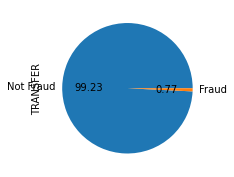

In [78]:
df_transfer=df[df['type']=='TRANSFER']
s=[]
for i in payment_type:
  df_i=df[df['type']==i]
  s.append(df_i)



print(s)
a=df_transfer.groupby('isFraud').count()
a['type'].plot.pie(subplots=True,figsize=(8, 3),label='TRANSFER',autopct='%.2f',labels=['Not Fraud','Fraud'])